<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/20_solo/Training%20and%20Inference%20Example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/21_maskrcnn/installation
     
 - Select the right file and run
 
     - chmod +x install.sh && ./install.sh

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
! cd Monk_Object_Detection/21_maskrcnn/installation && chmod +x install.sh && ./install.sh

# COCO Format

## Dataset Directory Structure

    ../sample_dataset (root_dir)
          |
          |------kangaroo (coco_dir) 
          |         |
          |         |---ImagesTrain (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---ImagesVal (set_dir)
          |         |----|
          |              |-------------------img1.jpg
          |              |-------------------img2.jpg
          |              |-------------------.........(and so on)
          |
          |
          |         |---annotations 
          |         |----|
          |              |--------------------instances_ImagesTrain.json  (instances_<set_dir>.json)
          |              |--------------------instances_ImagesVal.json  (instances_<set_dir>.json)
          |              |--------------------classes.txt
          
          
 - instances_Train.json -> In proper COCO format
 - classes.txt          -> A list of classes in alphabetical order
 

## Get more details on how to convert your dataset to coco instance segmentation format
 - https://patrickwasp.com/create-your-own-coco-style-dataset/
 - https://towardsdatascience.com/master-the-coco-dataset-for-semantic-image-segmentation-part-1-of-2-732712631047
 - https://github.com/adions025/XMLtoJson_Mask_RCNN
 - https://www.dlology.com/blog/how-to-create-custom-coco-data-set-for-instance-segmentation/

# For this example we use elephants subset from COCO API datasets

## Direct download the subset from here

In [ ]:
! wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1F-JzAv35lZPTv6UmBGlvY82FKZ7QskHL' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1F-JzAv35lZPTv6UmBGlvY82FKZ7QskHL" -O obj_thermal_soccer_trained.zip && rm -rf /tmp/cookies.txt

In [ ]:
! unzip -qq dataset_elephant_coco.zip

## This is how subset was created

In [ ]:
! wget http://images.cocodataset.org/zips/train2014.zip

! wget http://images.cocodataset.org/zips/val2014.zip
    
! wget http://images.cocodataset.org/annotations/annotations_trainval2014.zip
    
! unzip -qq train2014.zip

! unzip -qq val2014.zip

! unzip -qq annotations_trainval2014.zip

! mkdir elephant

! mkdir elephant/train
! mkdir elephant/train/images
! mkdir elephant/val
! mkdir elephant/val/images

In [ ]:
import json
import os
from tqdm import tqdm

with open('annotations/instances_train2014.json') as f:
    data = json.load(f)
    
elephant_data = {};
elephant_data["info"] = data["info"]
elephant_data["licenses"] = data["licenses"]
elephant_data["categories"] = [{'supercategory': 'animal', 'id': 1, 'name': 'elephant'}]
elephant_data["images"] = [];
elephant_data["annotations"] = [];

image_ids = [];

from tqdm import tqdm
for i in tqdm(range(len(data["annotations"]))):
    if(data["annotations"][i]["category_id"] == 22):
        data["annotations"][i]["category_id"] = 1;
        elephant_data["annotations"].append(data["annotations"][i])
        image_ids.append(data["annotations"][i]["image_id"])
        
from tqdm import tqdm
for i in tqdm(range(len(data["images"]))):
    if(data["images"][i]["id"] in image_ids):
        elephant_data["images"].append(data["images"][i])
        os.system("cp train2014/" + data["images"][i]['file_name'] + " elephant/train/images/")
        

with open('elephant/train/instances_train.json', 'w') as json_file:
    json.dump(elephant_data, json_file)

In [ ]:
import json
import os
from tqdm import tqdm

with open('annotations/instances_val2014.json') as f:
    data = json.load(f)
    
elephant_data = {};
elephant_data["info"] = data["info"]
elephant_data["licenses"] = data["licenses"]
elephant_data["categories"] = [{'supercategory': 'animal', 'id': 1, 'name': 'elephant'}]
elephant_data["images"] = [];
elephant_data["annotations"] = [];

image_ids = [];

from tqdm import tqdm
for i in tqdm(range(len(data["annotations"]))):
    if(data["annotations"][i]["category_id"] == 22):
        data["annotations"][i]["category_id"] = 1;
        elephant_data["annotations"].append(data["annotations"][i])
        image_ids.append(data["annotations"][i]["image_id"])
        
from tqdm import tqdm
for i in tqdm(range(len(data["images"]))):
    if(data["images"][i]["id"] in image_ids):
        elephant_data["images"].append(data["images"][i])
        os.system("cp val2014/" + data["images"][i]['file_name'] + " elephant/val/images/")
        

with open('elephant/val/instances_val.json', 'w') as json_file:
    json.dump(elephant_data, json_file)

# Training

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/21_maskrcnn/lib/")

In [2]:
from train_engine import Detector

In [3]:
gtf = Detector();

In [4]:
img_folder = "elephant/train/images"
anno_file = "elephant/train/instances_train.json"
class_file = "elephant/classes.txt"

gtf.Train_Dataset(img_folder, anno_file, class_file)

In [5]:
gtf.system_dict["params"]["classes"]

['elephant']

In [6]:
img_folder = "elephant/val/images"
anno_file = "elephant/val/instances_val.json"

gtf.Val_Dataset(img_folder, anno_file)

In [7]:
gtf.Dataset_Params(batch_size=2, num_workers=2)

In [8]:
gtf.List_Models();

1. Model - mask_rcnn_r50_fpn


In [9]:
gtf.Model_Params(model_name="mask_rcnn_r50_fpn", gpu_devices=[0])

In [10]:
gtf.Hyper_Params(lr=0.001, momentum=0.9, weight_decay=0.0001);

In [11]:
gtf.Training_Params(num_epochs=2, val_interval=1);

In [12]:
gtf.Train();

2020-09-26 06:39:40,213 - mmdet - INFO - Environment info:
------------------------------------------------------------
sys.platform: linux
Python: 3.6.9 (default, Jul 17 2020, 12:50:27) [GCC 8.4.0]
CUDA available: True
CUDA_HOME: /usr/local/cuda-10.0
NVCC: Cuda compilation tools, release 10.0, V10.0.130
GPU 0: Tesla V100-SXM2-16GB
GCC: gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
PyTorch: 1.4.0
PyTorch compiling details: PyTorch built with:
  - GCC 7.3
  - Intel(R) Math Kernel Library Version 2019.0.4 Product Build 20190411 for Intel(R) 64 architecture applications
  - Intel(R) MKL-DNN v0.21.1 (Git Hash 7d2fd500bc78936d1d648ca713b901012f470dbc)
  - OpenMP 201511 (a.k.a. OpenMP 4.5)
  - NNPACK is enabled
  - CUDA Runtime 10.1
  - NVCC architecture flags: -gencode;arch=compute_37,code=sm_37;-gencode;arch=compute_50,code=sm_50;-gencode;arch=compute_60,code=sm_60;-gencode;arch=compute_61,code=sm_61;-gencode;arch=compute_70,code=sm_70;-gencode;arch=compute_75,code=sm_75;-gencode;arch=compute_37

loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
Classes to be trained: ['elephant']


2020-09-26 06:39:45,554 - mmdet - INFO - load checkpoint from http://download.openmmlab.com/mmdetection/v2.0/mask_rcnn/mask_rcnn_r50_fpn_2x_coco/mask_rcnn_r50_fpn_2x_coco_bbox_mAP-0.392__segm_mAP-0.354_20200505_003907-3e542a40.pth
2020-09-26 06:39:45,705 - mmdet - WARNING - The model and loaded state dict do not match exactly

size mismatch for roi_head.bbox_head.fc_cls.weight: copying a param with shape torch.Size([81, 1024]) from checkpoint, the shape in current model is torch.Size([2, 1024]).
size mismatch for roi_head.bbox_head.fc_cls.bias: copying a param with shape torch.Size([81]) from checkpoint, the shape in current model is torch.Size([2]).
size mismatch for roi_head.bbox_head.fc_reg.weight: copying a param with shape torch.Size([320, 1024]) from checkpoint, the shape in current model is torch.Size([4, 1024]).
size mismatch for roi_head.bbox_head.fc_reg.bias: copying a param with shape torch.Size([320]) from checkpoint, the shape in current model is torch.Size([4]).
size mism

loading annotations into memory...
Done (t=0.03s)
creating index...
index created!


2020-09-26 06:39:59,485 - mmdet - INFO - Epoch [1][50/760]	lr: 9.890e-05, eta: 0:06:43, time: 0.274, data_time: 0.059, memory: 3990, loss_rpn_cls: 0.0101, loss_rpn_bbox: 0.0141, loss_cls: 0.4975, acc: 74.4629, loss_bbox: 0.2818, loss_mask: 0.5464, loss: 1.3499
2020-09-26 06:40:10,989 - mmdet - INFO - Epoch [1][100/760]	lr: 1.988e-04, eta: 0:05:58, time: 0.230, data_time: 0.016, memory: 3990, loss_rpn_cls: 0.0086, loss_rpn_bbox: 0.0140, loss_cls: 0.2056, acc: 91.7773, loss_bbox: 0.3096, loss_mask: 0.2280, loss: 0.7658
2020-09-26 06:40:22,698 - mmdet - INFO - Epoch [1][150/760]	lr: 2.987e-04, eta: 0:05:37, time: 0.234, data_time: 0.017, memory: 3990, loss_rpn_cls: 0.0073, loss_rpn_bbox: 0.0165, loss_cls: 0.1480, acc: 93.7305, loss_bbox: 0.3054, loss_mask: 0.2104, loss: 0.6876
2020-09-26 06:40:34,469 - mmdet - INFO - Epoch [1][200/760]	lr: 3.986e-04, eta: 0:05:21, time: 0.235, data_time: 0.017, memory: 4109, loss_rpn_cls: 0.0092, loss_rpn_bbox: 0.0184, loss_cls: 0.1037, acc: 96.5723, loss

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 714/714, 16.9 task/s, elapsed: 42s, ETA:     0s

2020-09-26 06:43:29,184 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2020-09-26 06:43:30,659 - mmdet - INFO - Epoch [1][760/760]	lr: 1.000e-03, bbox_mAP: 0.7060, bbox_mAP_50: 0.9300, bbox_mAP_75: 0.8170, bbox_mAP_s: 0.5380, bbox_mAP_m: 0.6830, bbox_mAP_l: 0.7600, bbox_mAP_copypaste: 0.706 0.930 0.817 0.538 0.683 0.760


DONE (t=1.27s).
Accumulating evaluation results...
DONE (t=0.17s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.706
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.930
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.817
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.538
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.683
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.760
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.767
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.767
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.767
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.614
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.738
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large |

2020-09-26 06:43:44,680 - mmdet - INFO - Epoch [2][50/760]	lr: 1.000e-04, eta: 0:02:47, time: 0.279, data_time: 0.061, memory: 4109, loss_rpn_cls: 0.0049, loss_rpn_bbox: 0.0187, loss_cls: 0.0612, acc: 97.6348, loss_bbox: 0.1018, loss_mask: 0.1913, loss: 0.3778
2020-09-26 06:43:56,479 - mmdet - INFO - Epoch [2][100/760]	lr: 1.000e-04, eta: 0:02:35, time: 0.236, data_time: 0.018, memory: 4109, loss_rpn_cls: 0.0048, loss_rpn_bbox: 0.0135, loss_cls: 0.0697, acc: 97.2520, loss_bbox: 0.0982, loss_mask: 0.1830, loss: 0.3692
2020-09-26 06:44:08,313 - mmdet - INFO - Epoch [2][150/760]	lr: 1.000e-04, eta: 0:02:24, time: 0.237, data_time: 0.017, memory: 4109, loss_rpn_cls: 0.0038, loss_rpn_bbox: 0.0166, loss_cls: 0.0622, acc: 97.5820, loss_bbox: 0.0981, loss_mask: 0.1890, loss: 0.3698
2020-09-26 06:44:19,933 - mmdet - INFO - Epoch [2][200/760]	lr: 1.000e-04, eta: 0:02:12, time: 0.232, data_time: 0.015, memory: 4109, loss_rpn_cls: 0.0037, loss_rpn_bbox: 0.0112, loss_cls: 0.0505, acc: 98.0527, loss

[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 714/714, 17.0 task/s, elapsed: 42s, ETA:     0s

2020-09-26 06:47:13,365 - mmdet - INFO - Evaluating bbox...


Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


2020-09-26 06:47:14,639 - mmdet - INFO - Epoch [2][760/760]	lr: 1.000e-04, bbox_mAP: 0.7200, bbox_mAP_50: 0.9310, bbox_mAP_75: 0.8290, bbox_mAP_s: 0.5490, bbox_mAP_m: 0.6960, bbox_mAP_l: 0.7770, bbox_mAP_copypaste: 0.720 0.931 0.829 0.549 0.696 0.777


DONE (t=1.09s).
Accumulating evaluation results...
DONE (t=0.15s).
Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.720
Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=1000 ] = 0.931
Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=1000 ] = 0.829
Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.549
Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.696
Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=1000 ] = 0.777
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.781
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=300 ] = 0.781
Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=1000 ] = 0.781
Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=1000 ] = 0.616
Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=1000 ] = 0.749
Average Recall     (AR) @[ IoU=0.50:0.95 | area= large |

# Inference

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/21_maskrcnn/lib")

In [2]:
from infer_engine import Infer

In [3]:
gtf = Infer();

In [4]:
config_file = 'work_dirs/config_updated/config_updated.py'
checkpoint_file = 'work_dirs/config_updated//latest.pth'

gtf.Model_Params(config_file, checkpoint_file, use_gpu=True)

Inference Time: 0.09325885772705078 sec
Saving Time: 0.022223711013793945 sec


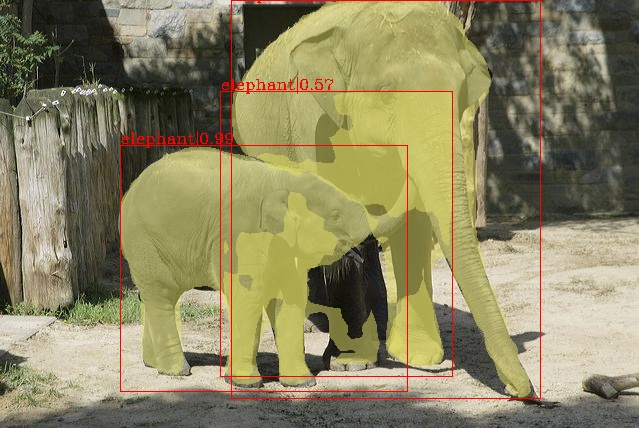

In [5]:
result = gtf.Predict(img_path="elephant/val/images/COCO_val2014_000000458311.jpg",
                out_img_path="result.jpg",
                thresh=0.3)

from IPython.display import Image
Image(filename='result.jpg') 

Inference Time: 0.07277822494506836 sec
Saving Time: 0.027658700942993164 sec


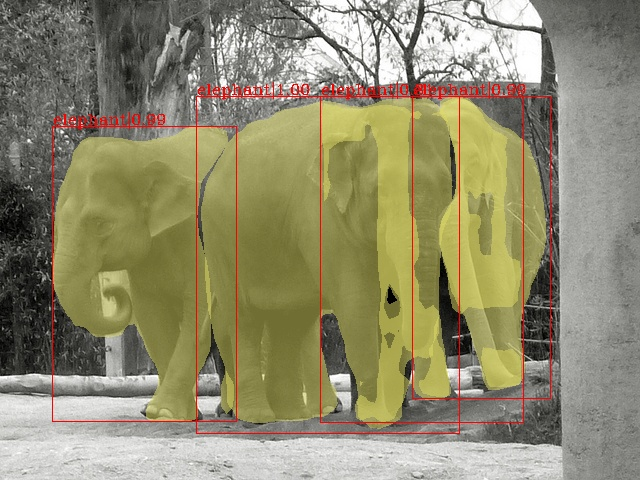

In [6]:
result = gtf.Predict(img_path="elephant/val/images/COCO_val2014_000000200752.jpg",
                out_img_path="result.jpg",
                thresh=0.3)

from IPython.display import Image
Image(filename='result.jpg') 

Inference Time: 0.08093500137329102 sec
Saving Time: 0.0167849063873291 sec


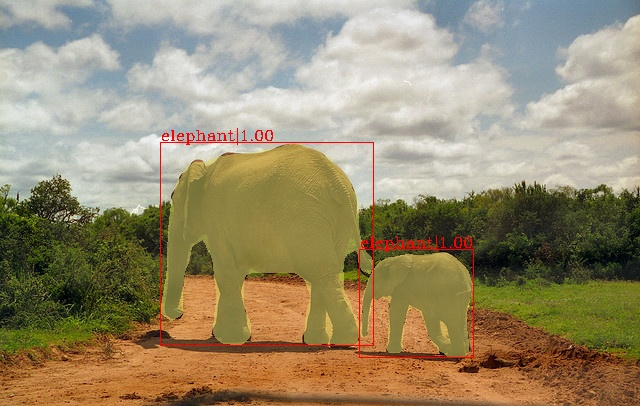

In [7]:
result = gtf.Predict(img_path="elephant/val/images/COCO_val2014_000000101959.jpg",
                out_img_path="result.jpg",
                thresh=0.3)

from IPython.display import Image
Image(filename='result.jpg')